In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from scipy.stats import sem
import matplotlib.cm as cm

In [5]:
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

# Helper functions

In [7]:
from sklearn.metrics import auc

In [2]:
def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [61]:
def get_df(base_exp, epsilons, net_yaml, dim, shuffobs=True):
    data = {
        'valid_score': [], 'valid_steps':[], 'dims': [],
        'learning_auc': [],
        'episode': [], 'model': [],
        'step': [], 'file': [], 'epsilon': []}
    for eps in epsilons:
        new_base_exp = base_exp
        if eps < 1.0:
            new_base_exp += f'_eps{eps}'
        if shuffobs:
            new_base_exp += '_shuffobs'
        task_name = new_base_exp
        task_name += f'_{net_yaml}_dim{dim}'
        task_dir = f'{engram_dir}pickles/{task_name}/'
        if not os.path.exists(task_dir): continue
        for pickle_file in os.listdir(task_dir):
            if not pickle_file.endswith('.p'): continue
            pickle_file = f'{task_dir}{pickle_file}'
            with open(pickle_file, 'rb') as f:
                results = pickle.load(f)
            valid_score = results['valid_score']
            valid_steps = results['valid_steps_per_ep']
            episode = results['episode']
            model = results['model']
            step = results['step']
            learning_auc = auc(episode, valid_score)/episode[-1]
            
            # Collect max scores
            data['valid_score'].append(valid_score[-1])
            data['valid_steps'].append(valid_steps[-1])
            data['dims'].append(dim)
            data['episode'].append(episode[-1])
            _model = model[-1].split(new_base_exp+'_')[-1]
            data['model'].append(_model)
            data['step'].append(step[-1])
            data['file'].append(pickle_file)
            data['epsilon'].append(eps)
            data['learning_auc'].append(learning_auc)
    df = pd.DataFrame(data)
    return df

# Experiment

In [41]:
epsilons = [.5, .6, .7, .8, .9, 1.0]

In [68]:
task_df = get_df('frozentransfer_new_gridworld8x8', epsilons, 'dm_large_q', 17)

In [69]:
np.unique(task_df['model'])

array(['entro2', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0',
       'g0_-2_entro-1', 'mf0'], dtype=object)

<AxesSubplot: xlabel='epsilon', ylabel='valid_score'>

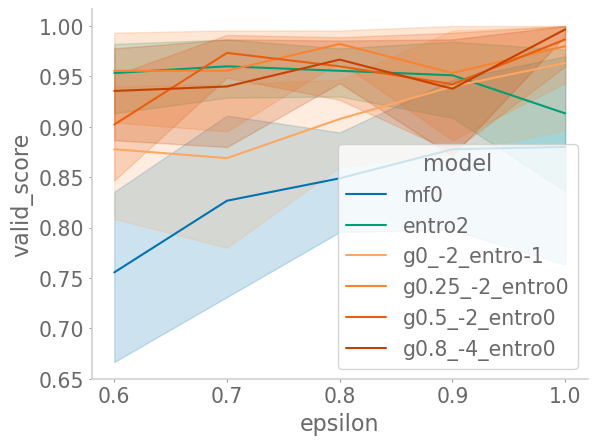

In [70]:
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plt.figure()
sns.lineplot(
    x='epsilon', y='valid_score', hue='model',
    hue_order=['mf0', 'entro2', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    palette=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    data=task_df
    )

<AxesSubplot: xlabel='epsilon', ylabel='learning_auc'>

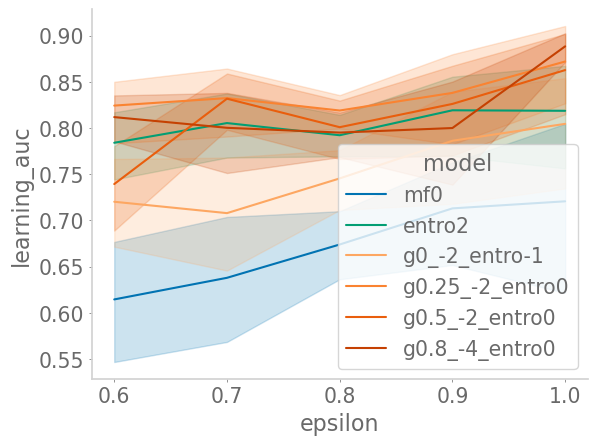

In [71]:
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plt.figure()
sns.lineplot(
    x='epsilon', y='learning_auc', hue='model',
    hue_order=['mf0', 'entro2', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    palette=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    data=task_df
    )